In [3]:
# Initialize opponents

from mcts_playground import TicTacToeState, Minimax, RandomAgent, MCTSConfig, MCTS, StandardWinLossTieEvaluator, TreeAgent

state = TicTacToeState()
agent = Minimax(state)
agent()

def minimax_agent_factory(state: TicTacToeState) -> Minimax:
    agent.set_root(state)
    return agent

opponents = {
    "Minimax": [minimax_agent_factory],
    "RandomAgent": [lambda state: RandomAgent(state)]
}

In [4]:
# Run benchmarks

import time


# Define different MCTS configurations with varying numbers of iterations
iterations_to_test = [1, 25, 50, 100, 200, 400, 800, 1600]
    
minimax_draw_rate = []
random_score = []

evaluator = StandardWinLossTieEvaluator(
    initial_state_creator=lambda: TicTacToeState(),
    opponents_creators=opponents,
    num_games=100,
)


for iterations in iterations_to_test:
    print(f"Benchmarking MCTS with {iterations} iterations...")
    
    # Run benchmark
    start_time = time.time()
    stats = evaluator(lambda state: MCTS(state, config=MCTSConfig(num_simulations=iterations)))
    elapsed_time = time.time() - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    
    # Store results
    minimax_draw_rate.append(stats["Minimax"]["tie_rate"])
    random_score.append(stats["RandomAgent"]["mean"])
    print(f"Minimax tie rate: {minimax_draw_rate[-1]:.2f}")
    print(f"RandomAgent mean: {random_score[-1]:.2f}\n")




Benchmarking MCTS with 1 iterations...
Time taken: 0.11 seconds
Minimax tie rate: 0.19
RandomAgent mean: -0.06

Benchmarking MCTS with 25 iterations...
Time taken: 0.89 seconds
Minimax tie rate: 0.53
RandomAgent mean: 0.84

Benchmarking MCTS with 50 iterations...
Time taken: 1.48 seconds
Minimax tie rate: 0.67
RandomAgent mean: 0.87

Benchmarking MCTS with 100 iterations...
Time taken: 2.83 seconds
Minimax tie rate: 0.81
RandomAgent mean: 0.90

Benchmarking MCTS with 200 iterations...
Time taken: 5.07 seconds
Minimax tie rate: 0.84
RandomAgent mean: 0.88

Benchmarking MCTS with 400 iterations...
Time taken: 9.09 seconds
Minimax tie rate: 0.91
RandomAgent mean: 0.97

Benchmarking MCTS with 800 iterations...
Time taken: 16.58 seconds
Minimax tie rate: 0.99
RandomAgent mean: 0.97

Benchmarking MCTS with 1600 iterations...
Time taken: 30.69 seconds
Minimax tie rate: 0.99
RandomAgent mean: 0.94



FileNotFoundError: [Errno 2] No such file or directory: './plots/tic_tac_toe_mcts_benchmark.png'

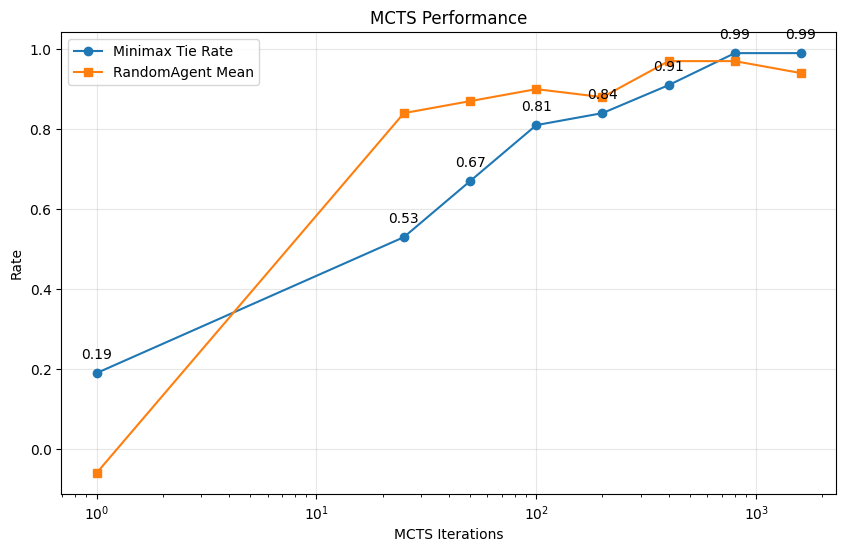

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Any

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(iterations_to_test, minimax_draw_rate, marker='o', label='Minimax Tie Rate')
plt.plot(iterations_to_test, random_score, marker='s', label='RandomAgent Mean')

plt.xscale('log')  # Use log scale for x-axis since iterations vary by orders of magnitude
plt.xlabel('MCTS Iterations')
plt.ylabel('Rate')
plt.title('MCTS Performance')
plt.grid(True, alpha=0.3)
plt.legend()

# Add exact values as annotations
for i, iterations in enumerate(iterations_to_test):
    plt.annotate(f"{minimax_draw_rate[i]:.2f}", 
                (iterations, minimax_draw_rate[i]), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Save plot
plt.savefig('plots/tic_tac_toe_mcts_benchmark.png')
plt.show()
